In [3]:
import numpy                as np
from astropy import units   as units

## matplotlib
from matplotlib.ticker      import AutoMinorLocator
from matplotlib             import rcParams, rc
import matplotlib           as mpl
import matplotlib.pyplot    as plt
import matplotlib.cm        as cm
from matplotlib.colors      import ListedColormap, LinearSegmentedColormap

from os import listdir
from tqdm import tqdm
from datetime import datetime


# Change the matplotlib default parameters
rcParams.update({'font.size':   8})
rcParams.update({'figure.dpi': 120})

outpath = '/STER/silkem/ChemTorch/out/'

In [4]:
name = datetime.now()
alpha = 0.5

success = listdir(outpath+'new/')
# fail = listdir(outpath+'fail/')

In [66]:
str(name)

'2023-08-30 15:57:31.077355'

In [8]:
abs = np.load(outpath+'fail/2023-08-11 11:27:53.349589/abundances.npy')
print(min(abs), max(abs))

-3.029715730246224e-27 0.08499999999999111


In [29]:
abs = np.load(outpath+'success/2023-08-08 05:51:26.987846/abundances.npy')
print(abs.T[0])
print(abs.shape)



[8.04848694e-07 4.35499884e-14 5.70188705e-16 2.53207415e-15
 1.36043580e-12 8.50000000e-02 1.32561897e-13 3.73085372e-17
 4.57610933e-19 2.43078921e-12 3.43191931e-08 8.67469512e-24
 4.45014730e-14 1.60252742e-09 3.91994910e-14 5.60203877e-18
 4.39855677e-08 7.37576034e-09 3.68250385e-08 3.71551465e-09
 5.70151263e-18 2.99832384e-11 1.07790329e-19 4.70462689e-15
 3.29700549e-11 8.08115166e-22 1.10671653e-09 9.35084472e-09
 1.78607155e-06 1.34643941e-18 1.21401286e-08 1.33658535e-17
 3.03248287e-10 5.92951423e-12 3.12161232e-08 4.54803066e-12
 1.40812261e-06 2.35481506e-13 1.75572194e-14 7.33443401e-11
 7.79331944e-21 8.49998238e-09 2.27435281e-21 1.79676752e-17
 0.00000000e+00 0.00000000e+00 4.23923456e-21 7.28337978e-16
 0.00000000e+00 0.00000000e+00 1.49271593e-09 1.41049626e-17
 2.48662927e-15 3.19247907e-10 4.69631946e-10 2.18804376e-05
 5.55070161e-09 1.78673739e-17 2.50185768e-18 2.04494525e-05
 2.90501395e-14 1.33602297e-08 1.82388480e-17 1.08973472e-14
 1.99932873e-05 1.902543

In [64]:
count = 0
negs = []
for i in tqdm(range(51537,len(success))):
    abs  = np.load(outpath+'success/'+success[i]+'/abundances.npy')
    if min(abs.T[0]) < 0:
        count +=1
        negs.append([min(abs.T[0]) ])
        # print(abs.T[0])

print(count/(len(success)-51537)*100)


100%|██████████| 79/79 [00:00<00:00, 2681.63it/s]

86.07594936708861


In [51]:
input1 = np.load(outpath + 'success/'+success[610] + '/input.npy')
input1

array([ 7.48487868e+06,  2.99632087e+03,  1.37608241e-03, -8.47972163e-01,
        1.36383431e+04])

In [65]:
negs

[[-4.5955752980413596e-58],
 [-7.428827667955719e-56],
 [-4.034637751418736e-26],
 [-1.6909737348649178e-58],
 [-1.0651565232631504e-22],
 [-1.0102503587700476e-24],
 [-4.6271136411189814e-60],
 [-4.5664795865529105e-29],
 [-1.6256707034652556e-28],
 [-1.6951331841004158e-26],
 [-5.489672148272049e-26],
 [-4.7124235272627246e-24],
 [-7.6704585395276935e-93],
 [-1.183083015801755e-61],
 [-1.883688093478717e-25],
 [-8.904868685715719e-40],
 [-2.7747575154783022e-28],
 [-3.77530761044736e-37],
 [-5.935950606198826e-22],
 [-2.005906382764439e-21],
 [-1.7837205208079538e-26],
 [-3.978838132093002e-27],
 [-1.7651911362858185e-20],
 [-1.6637617029189253e-59],
 [-7.489277688358865e-62],
 [-7.732470784505693e-25],
 [-5.155100246573439e-27],
 [-1.356255026484433e-66],
 [-4.4050406654803164e-21],
 [-3.3866225311983703e-62],
 [-1.2569508399758934e-62],
 [-1.807086145814162e-29],
 [-5.837732008926347e-21],
 [-8.479786751062578e-36],
 [-1.604740915368721e-25],
 [-2.4225546409983442e-23],
 [-4.370436

In [8]:
for i, dir in enumerate(success):
    if dir == '2023-08-28 14:18:09.017178':
        el = i
    # else:
    #     el = 'Not found'

print('before restart 1 # success: ', el)
print('before restart 1 # fail:   ', 41969)
print('       restart 2 # success:', 18734)


before restart 1 # success:  6150
before restart 1 # fail:    41969
       restart 2 # success: 18734


>> Plotting failed models...

>> Plotting succesful models...


100%|██████████| 3187/3187 [11:32<00:00,  4.60it/s]



>> Setting figure options...


100%|██████████| 4/4 [00:00<00:00, 7390.84it/s]


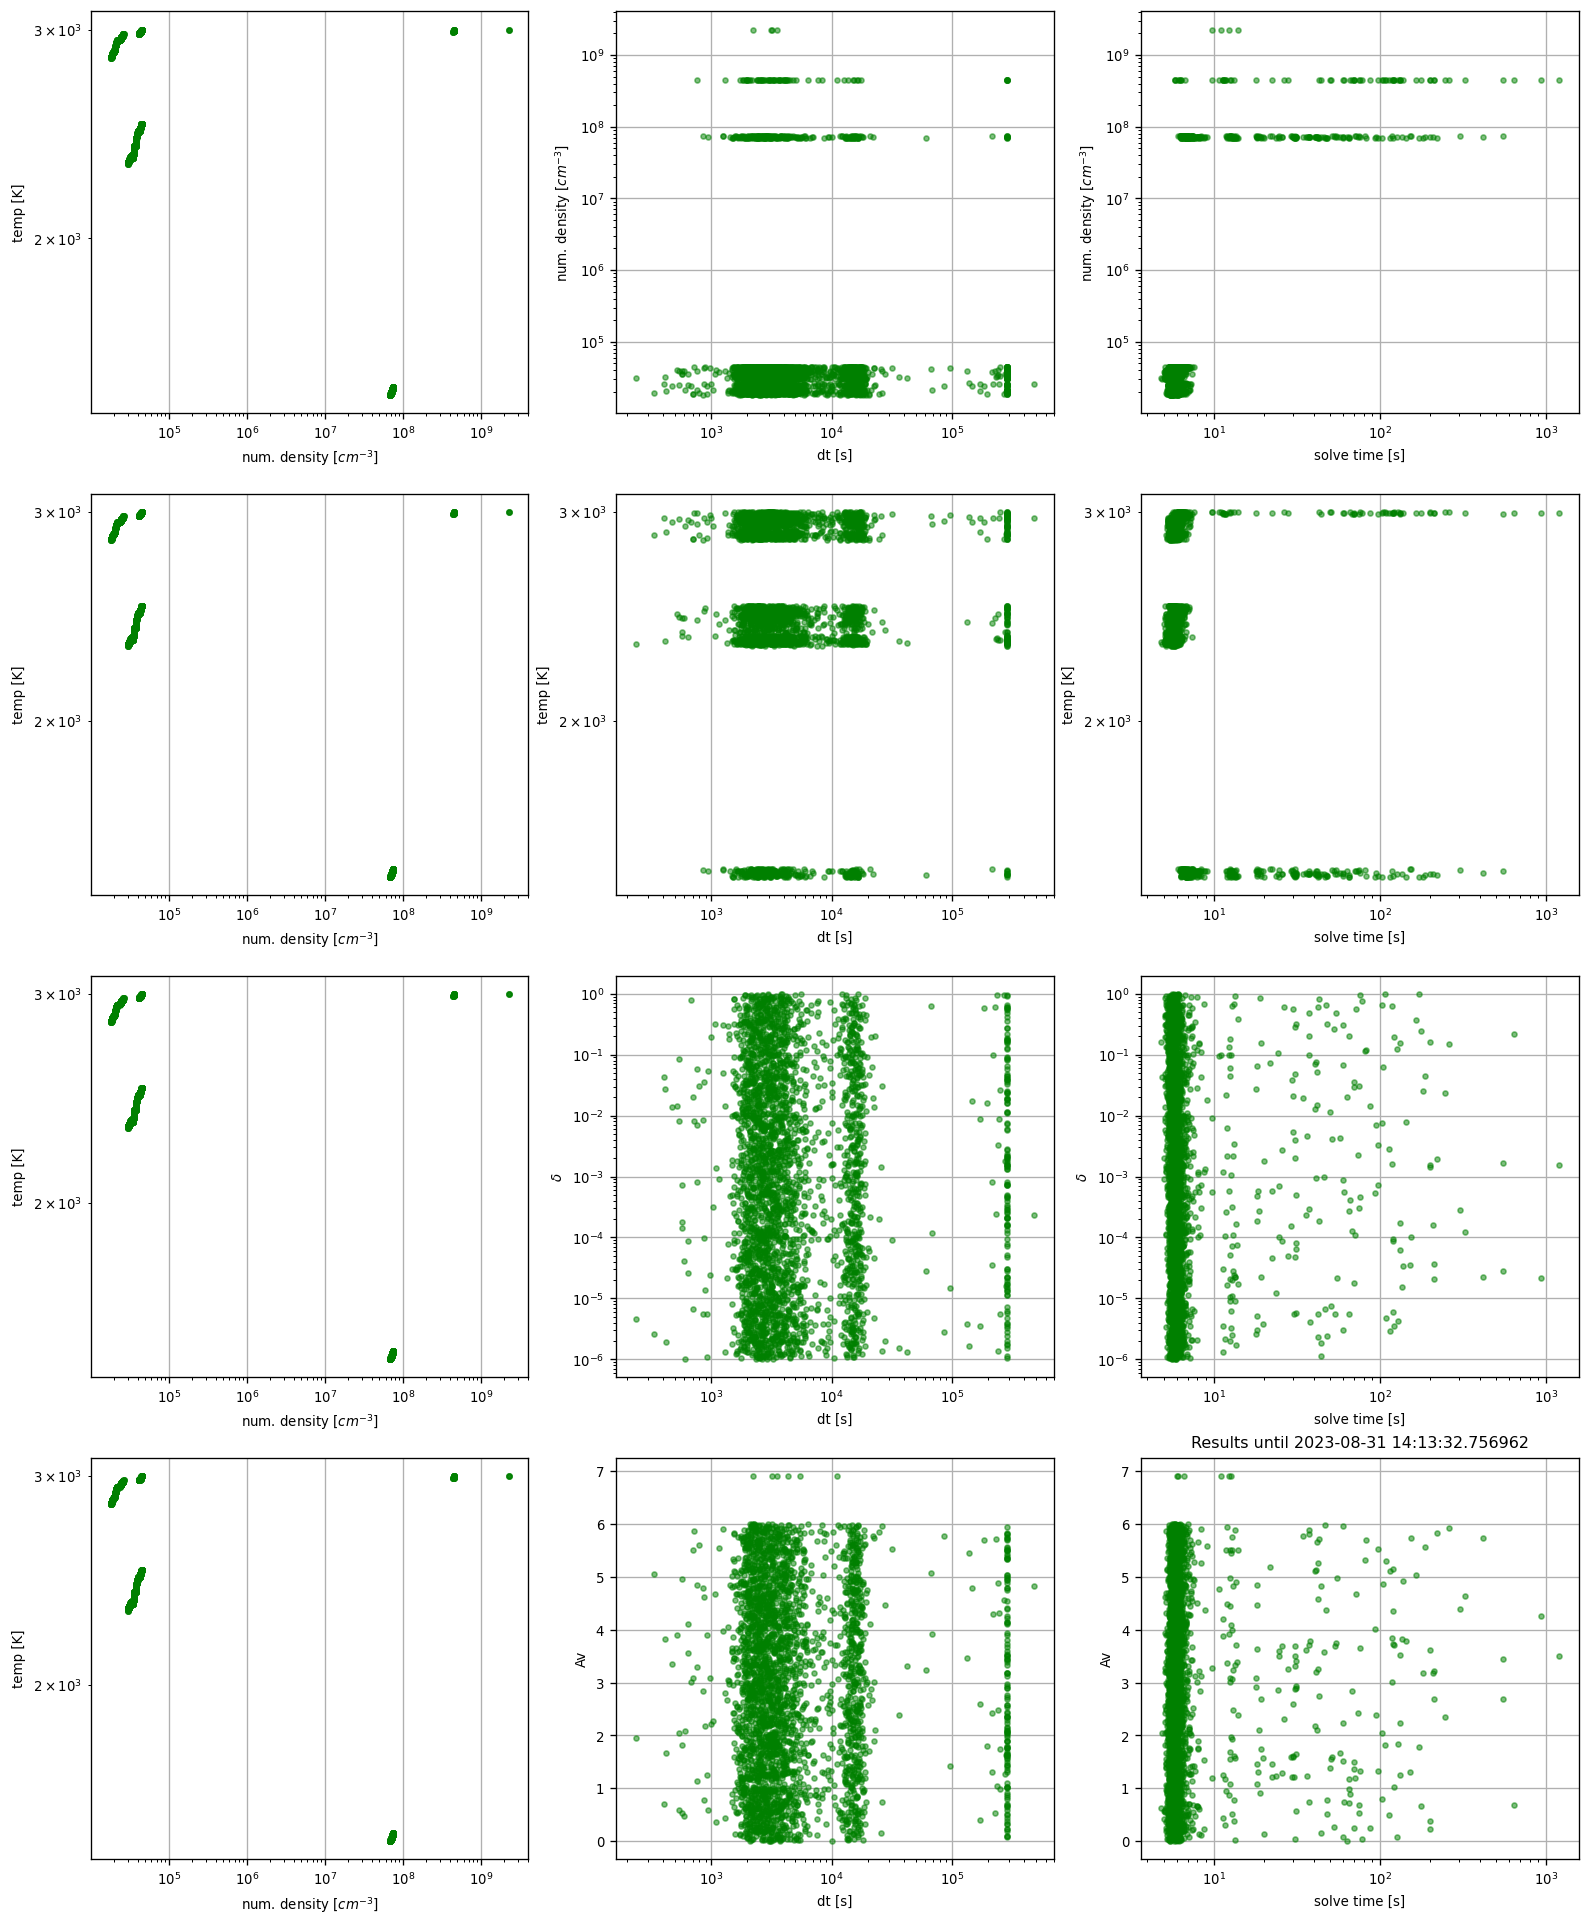

In [5]:
fig, ax = plt.subplots(4,3, figsize=(16, 20))

plt.title('Results until '+str(name))

m_fail = '.'
c_fail = 'firebrick'
alpha = 0.5

dt = 0

# print(">> Plotting failed models...")
# for i in tqdm(range(len(fail))):
#     input  = np.load(outpath+'fail/'+fail[i]+'/input.npy')
#     tictoc = np.load(outpath+'fail/'+fail[i]+'/tictoc.npy')

   
#     ## parameter space
#     ax[0,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)
#     ax[1,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)
#     ax[2,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)
#     ax[3,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)

#     ## density
#     ax[0,1].plot(input[-1],input[0], color = c_fail, marker = m_fail, alpha = alpha)
#     ax[0,2].plot(tictoc[0],input[0], color = c_fail, marker = m_fail, alpha = alpha)

#     ## temperature
#     ax[1,1].plot(input[-1],input[1], color = c_fail, marker = m_fail, alpha = alpha)
#     ax[1,2].plot(tictoc[0],input[1], color = c_fail, marker = m_fail, alpha = alpha)

#     ## delta
#     ax[2,1].plot(input[-1],input[2], color = c_fail, marker = m_fail, alpha = alpha)
#     ax[2,2].plot(tictoc[0],input[2], color = c_fail, marker = m_fail, alpha = alpha)

#     ## Av
#     ax[3,1].plot(input[-1],input[3], color = c_fail, marker = m_fail, alpha = alpha)
#     ax[3,2].plot(tictoc[0],input[3], color = c_fail, marker = m_fail, alpha = alpha)


m_suc = '.'
c_suc = 'green'

print("\n>> Plotting succesful models...")
for i in tqdm(range(len(success))):
# for i in tqdm(range(36341, len(success))):
    input  = np.load(outpath+'new/'+success[i]+'/input.npy')
    tictoc = np.load(outpath+'new/'+success[i]+'/tictoc.npy')

    # if i < 6150 and i >= 18734: 
    #     c_suc = 'green'
    # if i >= 6150 and i < 18734:
    #     c_suc = 'royalblue'
    
    ## parameter space
    ax[0,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[1,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[2,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[3,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)

    ## density
    ax[0,1].plot(input[-1],input[0], color = c_suc, marker = m_suc, alpha = alpha)
    ax[0,2].plot(tictoc[0],input[0], color = c_suc, marker = m_suc, alpha = alpha)

    ## temperature
    ax[1,1].plot(input[-1],input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[1,2].plot(tictoc[0],input[1], color = c_suc, marker = m_suc, alpha = alpha)

    ## delta
    ax[2,1].plot(input[-1],input[2], color = c_suc, marker = m_suc, alpha = alpha)
    ax[2,2].plot(tictoc[0],input[2], color = c_suc, marker = m_suc, alpha = alpha)

    ## Av
    ax[3,1].plot(input[-1],input[3], color = c_suc, marker = m_suc, alpha = alpha)
    ax[3,2].plot(tictoc[0],input[3], color = c_suc, marker = m_suc, alpha = alpha)

print('\n>> Setting figure options...')
for i in tqdm(range(len(ax))):
    for j in tqdm(range(len(ax[i]))):
        ax[i,j].set_xscale('log')
        ax[i,j].set_yscale('log')    
        ax[i,j].grid(True)

ax[3,1].set_yscale('linear')
ax[3,2].set_yscale('linear')

for i in tqdm(range(4)):
    ax[i,0].set_xlabel('num. density [$cm^{-3}$]')
    ax[i,0].set_ylabel('temp [K]')
    ax[i,1].set_xlabel('dt [s]')
    ax[i,2].set_xlabel('solve time [s]')


## density
ax[0,1].set_ylabel('num. density [$cm^{-3}$]')
ax[0,2].set_ylabel('num. density [$cm^{-3}$]')

## temperature
ax[1,1].set_ylabel('temp [K]')
ax[1,2].set_ylabel('temp [K]')

## delta
ax[2,1].set_ylabel('$\\delta$')
ax[2,2].set_ylabel('$\\delta$')

## Av
ax[3,1].set_ylabel('Av')
ax[3,2].set_ylabel('Av')

plt.show()
    

100%|██████████| 51616/51616 [02:20<00:00, 368.31it/s] 


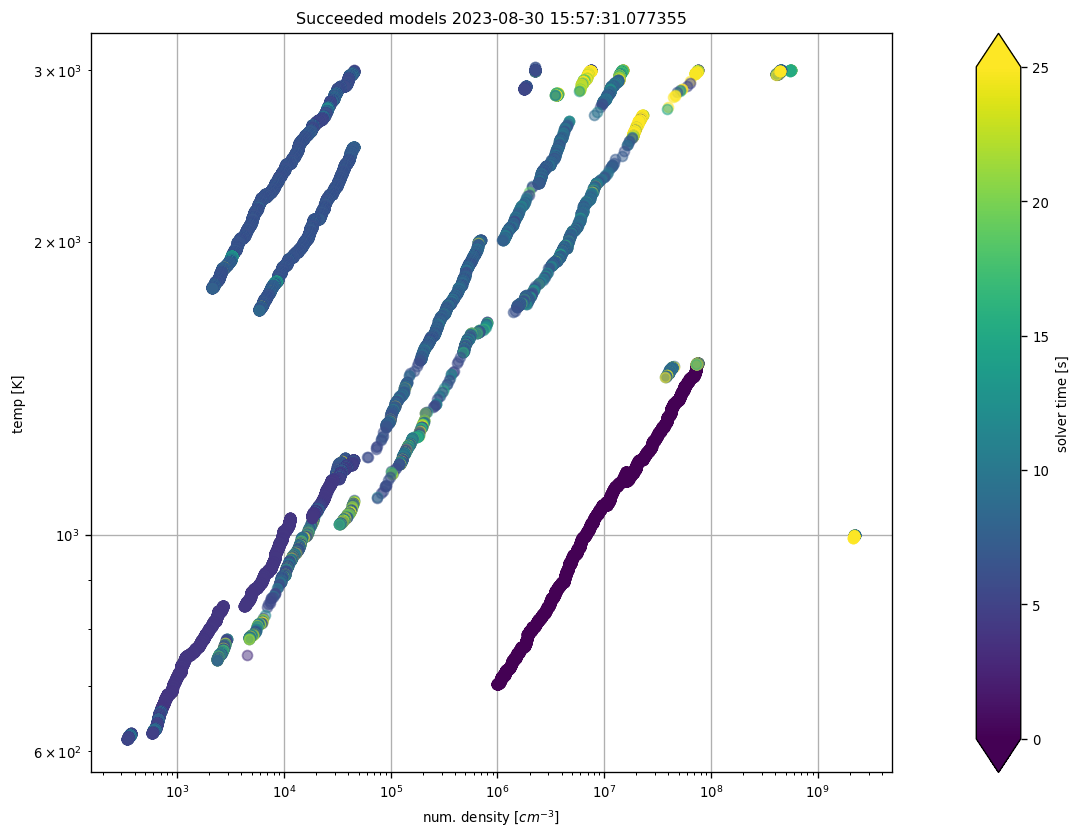

In [67]:
## plotting solve time via colormap

tmax = 25
time = np.linspace(0, 1, 10000)
colors = cm.viridis(time)

# print(colors)
m_suc = 'o'

fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [18,1]},figsize=(10, 8))

ax[0].set_title('Succeeded models '+ str(name))

# for i in range(16000,16020):
# for i in tqdm(range(5000,6000)):
for i in tqdm(range(len(success))):
    input  = np.load(outpath+'success/'+success[i]+'/input.npy')
    tictoc = np.load(outpath+'success/'+success[i]+'/tictoc.npy')


    if i < 6150:
        c_suc = 'green'
    elif i >= 6150:
        c_suc = 'royalblue'

    target = tictoc[0]
    idx = np.argmin(np.abs(time*tmax - target))
    c = colors[idx]

    # print(target, time[idx]*tmax, idx, c,input[0], input[1])

    ax[0].plot(input[0], input[1], color = c, marker = m_suc, alpha = alpha)
    
## Colorbar
cmap = cm.viridis
norm =  mpl.colors.Normalize(vmin=min(time*tmax), vmax=max(time*tmax))
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax[1], orientation='vertical', label = 'solver time [s]', extend = 'both')



ax[0].set_xscale('log')
ax[0].set_yscale('log')    
ax[0].grid(True)
ax[0].set_xlabel('num. density [$cm^{-3}$]')
ax[0].set_ylabel('temp [K]')

plt.show()

100%|██████████| 42633/42633 [01:15<00:00, 567.17it/s]


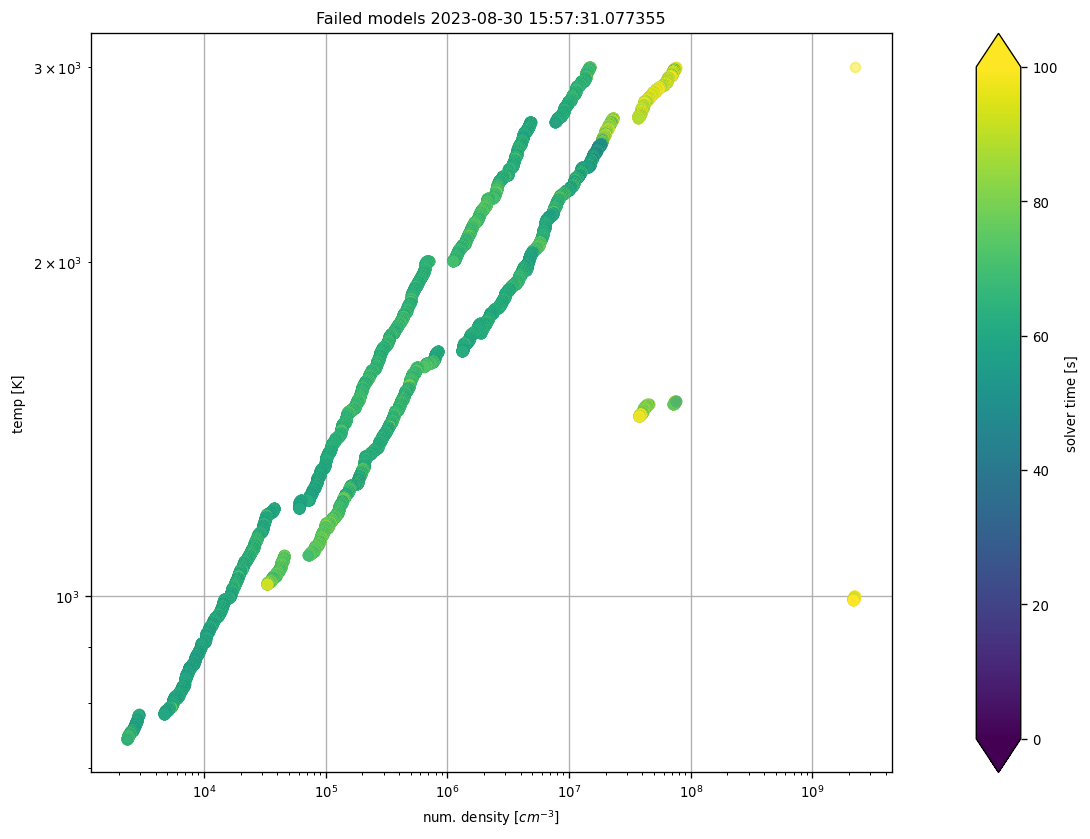

In [68]:
## plotting solve time via colormap

tmax = 100
time = np.linspace(0, 1, 128)
# print(time)
# colors = cm.viridis(time)

viridis_big = mpl.colormaps['viridis']
colors = (viridis_big(time))

# print(colors)
m_suc = 'o'

fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [18,1]},figsize=(10, 8))

ax[0].set_title('Failed models '+ str(name))

# for i in [16000,16020, 37920, 18479, 9843, 472, 5000, 6000]:
# for i in tqdm(range(5000,6000)):
for i in tqdm(range(len(fail))):
    input  = np.load(outpath+'fail/'+fail[i]+'/input.npy')
    tictoc = np.load(outpath+'fail/'+fail[i]+'/tictoc.npy')


    if i < 6150:
        c_suc = 'green'
    elif i >= 6150:
        c_suc = 'royalblue'

    target = tictoc[0]
    idx = np.argmin(np.abs(time*tmax  - target))
    c = colors[idx]

    # print(target, time[idx]*tmax, idx, c,np.log10(input[0]), np.log10(input[1]))

    ax[0].plot(input[0], input[1], color = c, marker = m_suc, alpha = alpha)

# print('\n', min(time*tmax),max(time*tmax))

vmin = 50
vmax = 100

## Colorbar
cmap = cm.viridis
norm =  mpl.colors.Normalize(vmin=min(time*tmax), vmax=max(time*tmax), clip = True)
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax[1], orientation='vertical', label = 'solver time [s]', extend = 'both')



ax[0].set_xscale('log')
ax[0].set_yscale('log')    
ax[0].grid(True)
ax[0].set_xlabel('num. density [$cm^{-3}$]')
ax[0].set_ylabel('temp [K]')

plt.show()

In [54]:
for c in colors:
    print(c)

[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.